# TP Caractérisation des pleurs de nouveau-né prématuré

## 1. Contexte applicatif


Un bébé est dit prématuré s’il est né avant la 35ième semaine de grossesse. La prématurité concerne approximativement 60000 naissances par an en France, soit 7% des naissances. Les nouveau-nés prématurés ont plusieurs fonctions immatures comme le système digestif, le système immunitaire, le cerveau, etc. et entament leur vie en couveuse. Ceci impose une grande surveillance de ces bébés pour suivre l’évolution de leur état de santé, mais aussi de leur maturation, afin de programmer au mieux la sortie de la couveuse et plus tard la sortie de l’hôpital. Cette surveillance repose sur l’acquisition de plusieurs signaux nécessitant un nombre plus ou moins élevé de capteurs.
Afin de limiter l’effet invasif de ce monitoring des travaux ont portés sur l’analyse de signaux sans contact comme la vidéo ou l’audio.  
Dans ce TP, nous allons nous concentrer sur l’analyse de bandes son contenant des pleurs de nouveau-nés prématurés. Le but de ce TP est alors d’extraire des paramètres permettant de décrire ces pleurs. Nous commencerons par appliquer la méthode sur un cas, puis nous comparerons différentes populations afin d’observer l’intérêt clinique d’une telle approche.

## 2. Présentation de la méthode


La Figure 1 présente un exemple de son enregistré dans la chambre d’un nouveau-né prématuré.  Ce signal est bruité notamment par les voix des infirmières, le son des appareils, le bruit de fond, etc. Afin de caractériser uniquement les pleurs, il est d’abord nécessaire de les extraire du reste du signal (Segmentation), puis de calculer les paramètres décrivant ces pleurs (Caractérisation).



In [1]:
%%html
<img src="BandeSon.png",width=200,length=200>
Exemple de bande son obtenu dans une chambre de Néonatalogie à l’hôpital Rennes Sud

### a. Segmentation

Cette méthode s’appuie sur 2 étapes : 
1.	Détection des périodes de signal à forte énergie
2.	Classification des périodes à partir de la fft

### b. caractérisation

Une fois les pleurs extraits, il est possible de les caractériser. 

## 3.	Implémentation de la méthode de segmentation (2H)

### a.	Chargement du fichier  ‘crying_beeps.wav’

•	Utiliser la fonction audioread.
Pour cela vous aurez besoin de comprendre le fonctionnement de la fonction audioread. Utilisez 'help' pour comprendre comment audioread permet d'extraire un fichier son et sa fréquence d'échantillonnage.
•	Afficher le signal.

In [2]:
help audioread

'audioread' is a function from the file C:\Octave\Octave-4.4.1\lib\octave\4.4.1\oct\x86_64-w64-mingw32\audioread.oct

 -- [Y, FS] = audioread (FILENAME)
 -- [Y, FS] = audioread (FILENAME, SAMPLES)

 -- [Y, FS] = audioread (FILENAME, DATATYPE)
 -- [Y, FS] = audioread (FILENAME, SAMPLES, DATATYPE)
     Read the audio file FILENAME and return the audio data Y and
     sampling rate FS.

     The audio data is stored as matrix with rows corresponding to audio
     frames and columns corresponding to channels.

     The optional two-element vector argument SAMPLES specifies starting
     and ending frames.

     The optional argument DATATYPE specifies the datatype to return.
     If it is "native", then the type of data depends on how the data is
     stored in the audio file.

     See also: audiowrite, audioformats, audioinfo.

Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to search the manual index.


In [2]:
....; %Utilisez la fonction audioread comme proposé par le guide help pour lire le fichier son 'crying_beeps.wav'

Pour écouter le fichier son correspondant au signal que vous avez, il serait possible avec Matlab de l'écouter directement en utilisant la fonction 'soundsc'. Malheuresement, la plateforme 'Binder' que nous utilisons ne peut pas lire de fichier son. Vous allez donc devoir écrire le fichier son dans un fichier 'wav' avec la commande audiowrite. Utilisez l'aide pour comprendre comme écrire un fichier son avec le nom que vous désirez, en partant du signal que vous désirez à la fréquence que vous désirez. Une fois le fichier wav écrit, dirigez-vous dans la fenêtre internet correspondant à vos dossiers. Cochez le fichier son et un bouton 'download' apparait. Téléchargez le fichier et lisez-le sur votre ordinateur avec n'importe quel logiciel déjà installé par défaut.

In [ ]:
audiowrite( ... , ... , ... ) %Ecrire le fichier

% Télécharger le fichier dans la fenêtre internet de vos dossiers (cochez puis download) et écouter le fichier

Il est ensuite possible d 'afficher le signal avec 'plot'.

In [ ]:
soundsc(extrait, FS)  %Lecture du fichier son. A modifier selon le nom de vos variables.

% Eviter de lancer des commandes octave lorsque 'soundsc' est en utilisation

In [ ]:
figure(1)
plot((1:length(extrait))/FS,extrait) %A modifier selon le nom de vos variables.
xlabel(...)
title(...)

### b.	Segmentation par l’énergie glissante 


L’opération de filtrage par convolution (ici lissage) que nous appliquons ici, s’écrit :

$\textbf{E}(m,w)=\frac{1}{N}\sum_{n=-\infty}^{\infty}(\textbf{x}[n]\ast\textbf{w}[n-m])^2$

où w est la fenêtre sur laquelle nous calculons la valeur de l’énergie, ici nous utilisons une fenêtre de type ‘Porte’ de taille N. Ainsi l’énergie de chaque échantillon est obtenue en moyennant l’énergie des N/2 échantillons le précédent et les N/2 échantillons le suivant. On choisit ici N=30. On vous donne le code suivant permettant de réaliser le calcul d'énergie, complétez le avec le nom de la variable correspondant au fichier son que vous avez choisi:

In [ ]:
    % calcul de l'energie
    N=...
    signal_energie = zeros(length(...),1);
   for n=N/2+1:length(...)-N/2-1 %
       carre_signal_sur_fenetre = ...(n-N/2:n+N/2).^2;
     signal_energie(n) = (1 / N)*sum(carre_signal_sur_fenetre);
end
% attention les calculs peuvent être longs selon l'état de forme de la machine virtuelle
   figure(2) % A vous de représenter le signal d'énergie
...
...
...

Le signal d'énergie que vous observez
On souhaite maintenant lisser le signal d'énergie pour réduire le bruit et pour en faciliter son traitement. On utilise pour cela un lissage moyen sur une fenêtre de taille 100:

In [ ]:
    win=...;
    h=ones(1,win)/win;
    signal_energie_lisse=filter(h,1,...);
    
    figure(...)% Représenter le signal d énergie lissé
...
...
...
    


La différence n'est pas forcément flagrante entre la figure 2 et 3 mais vu de près, le signal lissé est beaoucoup moins mouvementé et sera plus facile à traiter.
On souhaite à présent garder uniquement les parties du signal où il y a une forte énergie car cela correspond aux moment où il y a un volume sonore important ce qui peut être un pleur de bébé. Pour cela, nous devons créer un seuil, comparer notre signal au seuil pour en déduire les zones à conserver et celle à supprimer.

In [ ]:
seuil=0.0021;  % On propose d'utiliser un seuil choisi arbitrairement.

signal_seuille=(signal_energie_lisse>...).*...; % On multiplie le booléen de la condition 'signal > seuil' 
                                                    %par le signal ORIGINAL
                                                    
                                                   
figure(4)
plot((1:length(extrait))/FS,signal_energie_lisse)
hold on 
plot((1:length(extrait))/FS,seuil*ones(length(extrait),1),'color','red')
xlabel('Temps (sec)')
title('representation du seuil pour enlever les zones vides d energie')

figure(5)
plot((1:length(extrait))/FS,signal_seuille)
xlabel('Temps (sec)')
title('Signal obtenu apres le seuil')

Ecouter et analyser le résultat. Qu'en pensez-vous ? 

In [ ]:
audiowrite( ... , ... , ... );

### c. Classification des périodes détectées à l’aide de la FFT
Nous avons extrait les périodes de fortes énergies et ainsi éliminé le bruit de fond. Nous souhaitons maintenant garder uniquement celles associées à des pleurs.  Pour cela, nous allons nous intéresser à la représentation de nos segments dans le domaine fréquentiel.  En effet, la représentation fréquentielle d’un pleur n’a pas la même allure que celle d’un évènement indésirable (par exmple un bip).
La méthode proposée ici pour différencier ces deux formes de spectre se base sur l’hypothèse que le son indésirable que nous entendons (Figure A) est composé de moins de fréquences (plus parcimonieux) qu’un pleur (Figure B). 


In [ ]:
%%html
<img src="Spectre_Son_Indesirable.png",width=200,length=200>
Figure A : Exemple de spectre d un son indesirable
%%html
<img src="Spectre_Pleur.png",width=200,length=200>
Figure B : Exemple du spectre d un pleur




Pour différencier les deux formes de spectre observées, nous pouvons utiliser le nombre de fois que le signal traverse la valeur moyenne.


Cependant, effectuer ces calculs sur une machine virtuelle est nettement moins agréable que sur une vraie machine avec Matlab (qui possède gestionnaire de variaibles, affichages de figures indépendants, possibilité d'appeler des fonctions, puissance de calcul d'une vraie machine en TP bien supéreieure à celle d'une machine virtuelle, et absence de super encadrant de TP pour aider les élèves...). Cette partie ne sera donc malheuresement pas implémentée ici. On admettra donc que l'étude du nombre de pasage à la moyenne de la transformée de Fourrier permet de distinguer les bruits de pleurs et les bruits de bip. Nous allons donc passer à la partie suivante.

## 4.	Caractérisation des pleurs et comparaison de groupes - (1H) - Partie indépendante

### a.	Extraction de la durée moyenne des pleurs

Une fois les périodes de pleurs détectées, différents paramètres peuvent être calculés (durées des pleurs, fréquence fondamentale…). Ici, nous allons uniquement nous concentrer sur la durée moyenne des pleurs.
•	On admettra que la durée moyenne des pleurs pour ce bébé est de 0.45 seconde.

### b.	Comparaison de groupes

Dans cette partie, nous allons observer les valeurs obtenues pour deux populations différentes : des bébés sans pertes auditives et des bébés avec.
•	Charger les données avec load (donnees_bebe.mat) (si besoin regardez l'aide de la focntion 'load')
Les données sont présentées sous forme de deux colonnes :
-	La première colonne indique le type de sujet 1 pour sain, 2 pour ceux souffrant d’une perte de l’audition
-	La deuxième contient les durées moyennes des pleurs calculées

•	Présenter les valeurs sous forme de boxplot (utiliser boxplot)
•	Commenter ce résultat quant à la santé du bébé en quesion.


In [27]:
Donnees=...
A=Donnees.data.data.data  %Octave utilise beaucoup trop de couches pour encapsuler les data
L=length(A)

Donnees =

  scalar structure containing the fields:

    data =

      scalar structure containing the fields:

        data =

          scalar structure containing the fields:

            data: 20x2 matrix



A =

   1.00000   0.65000
   1.00000   0.39000
   1.00000   0.25100
   1.00000   0.27100
   1.00000   0.29700
   1.00000   0.95200
   1.00000   0.44100
   1.00000   0.46400
   1.00000   0.34000
   1.00000   0.54900
   2.00000   1.11400
   2.00000   0.83500
   2.00000   1.30000
   2.00000   1.79200
   2.00000   0.76700
   2.00000   1.02400
   2.00000   0.59700
   2.00000   0.68200
   2.00000   0.76800
   2.00000   0.37400

L =  20


h2 =

   0.37400
   0.70325
   0.80150
   1.09150
   1.79200
   0.70325
   0.99426



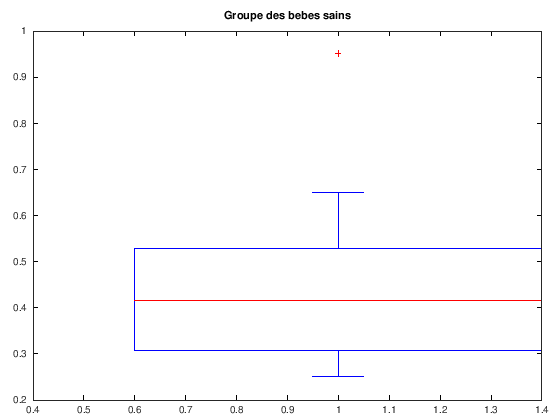

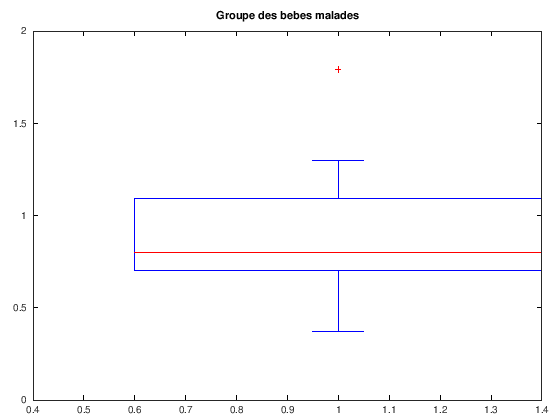

In [28]:
pkg load statistics % package nécessaire à l'utilisation de la focntion'boxplot' sur octave.

bebes_sains = A(1:10,2);
bebes_malades = ... ;

figure(6)
h1 = boxplot(bebes_sains);
title( ... )
figure(7)
h2=... ;
title(...)
save('donnees_bebe.mat','data');


En espérant que ce format puisse vous convenir et que vous puissiez progresser tranquillement ! N'oubliez pas d'exporter votre compte-rendu en html et de les envoyer à kimi-piedad.owashi@univ-rennes1.fr pour l'évaluation de votre travail. N'hésitez pas à faire remonter les éventuels problèmes, les questions ou des oublis en envoyant un mail à l'adresse suivante : pierreantchantal@gmail.com. Pour participer à la création, consultez le chapitre 0.3.